In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Given data from four different locations within Denver, we would expect the observations to be relatively close to one another for any given date. However, this still leads to the question of whether or not these four relatively close locations are distinct enough from one another. Let's find out by examining the temperature, percipitation, and snowfall in each location.

In [2]:
# file path
fname = "denver_weather_train.csv"

df = pd.read_csv(f'../Project1/data/{fname}')
df["DATE"] = pd.to_datetime(df["DATE"])

# set primary key to DATE and NAME
df.set_index(["DATE", "NAME"], inplace=True)

df.head()

YEAR  MONTH  DAY      STATION  \
DATE       NAME                                                              
2005-01-01 DENVER CENTENNIAL AIRPORT, CO US  2005      1    1  USW00093067   
           DENVER CENTRAL PARK, CO US        2005      1    1  USW00023062   
           DENVER WATER DEPARTMENT, CO US    2005      1    1  USC00052223   
2005-01-02 DENVER CENTENNIAL AIRPORT, CO US  2005      1    2  USW00093067   
           DENVER CENTRAL PARK, CO US        2005      1    2  USW00023062   

                                             PRCP  TMAX  TMIN  SNOW  SNWD  \
DATE       NAME                                                             
2005-01-01 DENVER CENTENNIAL AIRPORT, CO US   0.0  51.0  22.0   0.0   0.0   
           DENVER CENTRAL PARK, CO US         0.0  58.0  21.0   0.0   0.0   
           DENVER WATER DEPARTMENT, CO US     0.0  28.0  20.0   0.0   0.0   
2005-01-02 DENVER CENTENNIAL AIRPORT, CO US   0.0  34.0  21.0   0.0   0.0   
           DENVER CENTRAL PARK, CO US         0.0  45.0  19.0   0.0   0.0   

                                             AWND   WDF2   WDF5  WSF2  WSF5  \
DATE       NAME                                                               
2005-01-01 DENVER CENTENNIAL AIRPORT, CO US  7.61  260.0  250.0  21.0  29.1   
           DENVER CENTRAL PARK, CO US        7.61  260.0  250.0  21.0  29.1   
           DENVER WATER DEPARTMENT, CO US    7.61  260.0  250.0  21.0  29.1   
2005-01-02 DENVER CENTENNIAL AIRPORT, CO US  5.14  160.0  160.0  14.1  15.0   
           DENVER CENTRAL PARK, CO US        5.14  160.0  160.0  14.1  15.0   

                                                                  TARGET  
DATE       NAME                                                           
2005-01-01 DENVER CENTENNIAL AIRPORT, CO US  (0.0, 58.0, 21.0, 0.0, 0.0)  
           DENVER CENTRAL PARK, CO US        (0.0, 28.0, 20.0, 0.0, 0.0)  
           DENVER WATER DEPARTMENT, CO US    (0.0, 34.0, 21.0, 0.0, 0.0)  
2005-01-02 DENVER CENTENNIAL AIRPORT, CO US  (0.0, 45.0, 19.0, 0.0, 0.0)  
           DENVER CENTRAL PARK, CO US        (0.0, 45.0, 20.0, 0.0, 0.0)

### First let's explore the temperature around Denver, CO. To do this, we'll plot the average temperature for each month as a function of time (years). We will use 12 line plots (one for each month) to show the evolution of the average maximum daily temperature in each month.

In [3]:
# station names
station_names = df.index.get_level_values("NAME")
unique_station_names = station_names.unique()

# months
months = ["January",
          "February",
          "March",
          "April",
          "May",
          "June",
          "July",
          "August",
          "September",
          "October",
          "November",
          "December"]

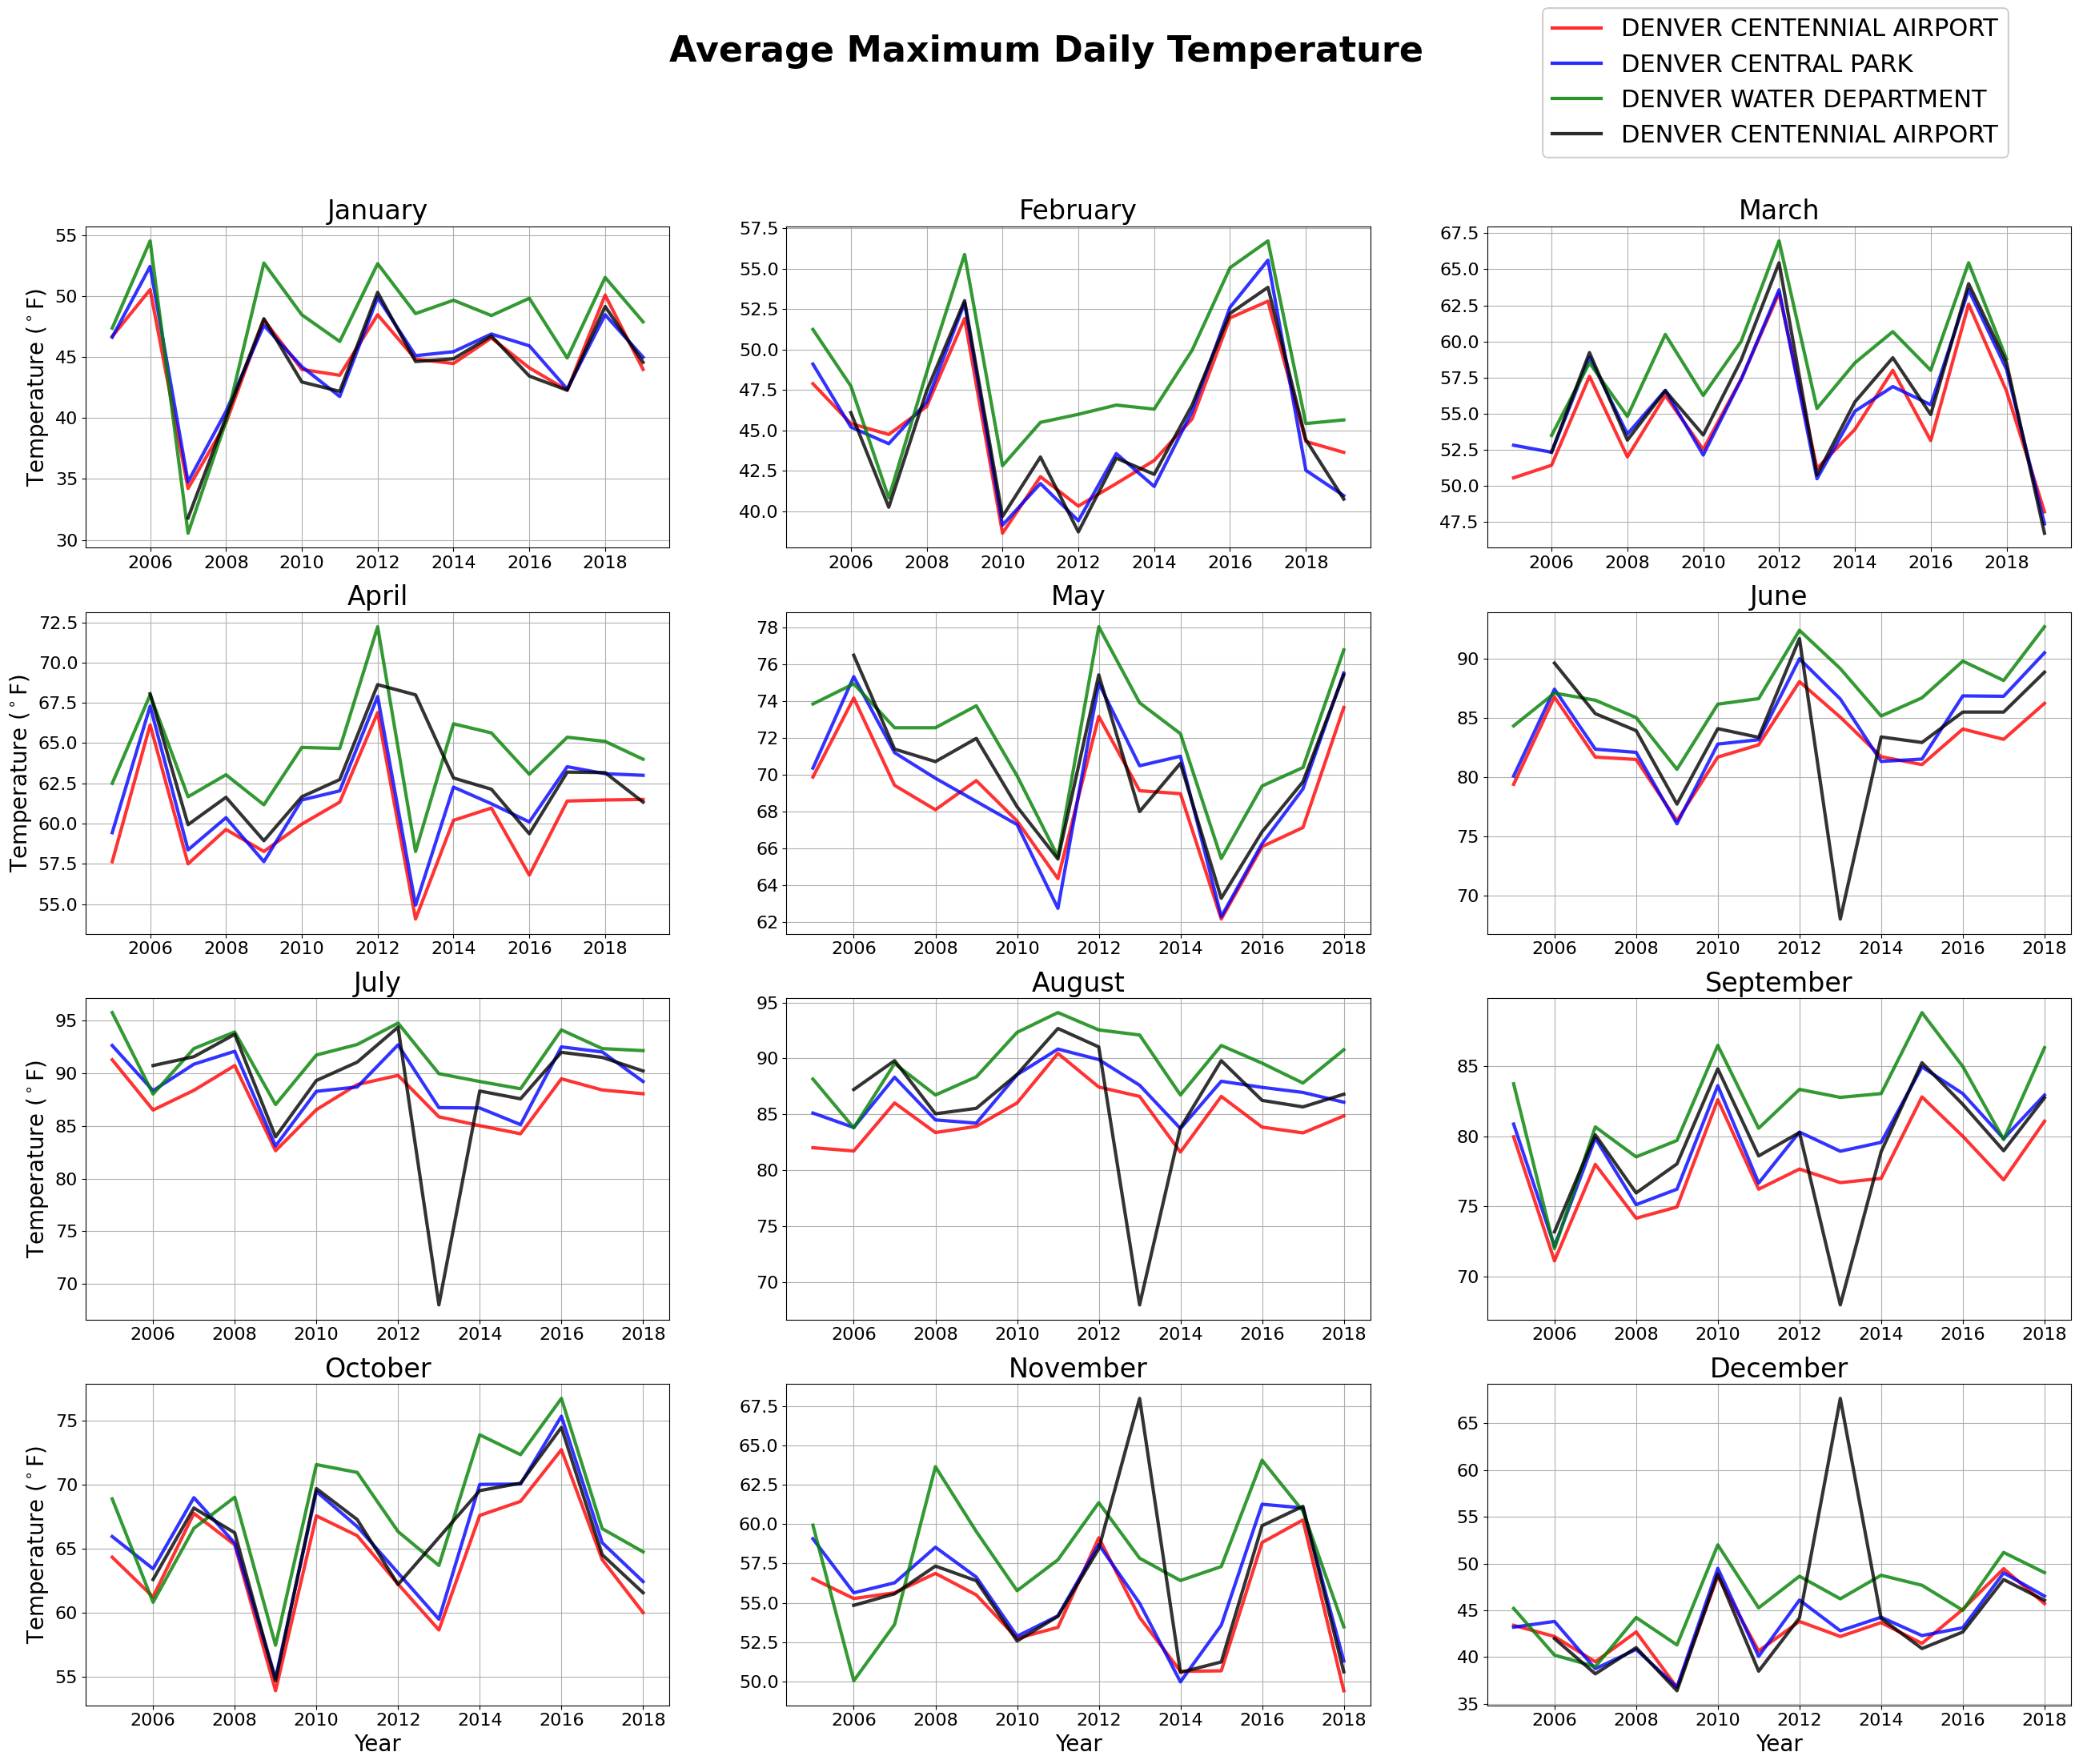

In [4]:
# line colors for each station
colors = ['r', 'b', 'g', 'k']

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(32,24))

fig.suptitle("Average Maximum Daily Temperature", fontsize=32, fontweight='bold')

# each plot represents the evolution of the average maximum daily temperature for a particular month
for m in range(len(months)):
  # set title and grid for each month's plot
  ax[m//3, m%3].set_title(f'{months[m]}', fontsize=24)
  ax[m//3, m%3].grid()

  # filter data by current month
  df_month = df[df["MONTH"]==m+1]


  for s in range(len(unique_station_names)):

    # group the entries by name of station and year for the current month
    df_month = df_month.groupby(["NAME", "YEAR"]).mean(numeric_only=True)

    # plot the average of daily maximums observed by each station
    # label each line with the corresponding station name
    ax[m//3, m%3].plot(df_month.xs(key=unique_station_names[s], level="NAME")["TMAX"],
                       label=station_names[s][:-7],
                       color=colors[s],
                       linewidth=3,
                       alpha=0.8)
    # adjust tick size
    ax[m//3, m%3].tick_params(axis='both', which='major', labelsize=16)

  # insert legend
  handles, labels = ax[0,0].get_legend_handles_labels()
  fig.legend(handles, labels, bbox_to_anchor=(0.88,1), fontsize=22)


# label axes
ax[0,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)
ax[1,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)
ax[2,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)
ax[3,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)

ax[-1,0].set_xlabel('Year', fontsize=20)
ax[-1,1].set_xlabel('Year', fontsize=20)
ax[-1,2].set_xlabel('Year', fontsize=20)

plt.show()

### On average, it seems like the Denver Water Department has the highest daily maximum while Denver Centennial Airport has the lowest daily highs. Next let's find out how the frequency of extreme heat events (temperatures above $\geq90^\circ$F) have evolved in each of the four locations.

###Note that we exclude 2019 from our plot because we only have data for the first quarter of the year. This will ensure that we don't see a significant drop in the number of extreme heat events observed between 2018 and 2019. We keep 2006 in the case of Denver International Airport despite not having the full data for that year because our observations begin in February. It is unlikely that temperatures above $90^\circ$F were observed at the beginning of the year.

In [5]:
# filter by TMAX >= 90
df_extreme = df[df["TMAX"] >= 90]

# exclude 2019 since we don't have full data for this year
df_extreme = df_extreme[df_extreme["YEAR"] != 2019]

# group by location and year
# count number of extreme heat events
df_extreme = df_extreme.groupby(["NAME", "YEAR"])["TMAX"].count()

# count number of values
df_etreme = df_extreme.rename("Number of Extreme Heat Events")
df_extreme.head()

NAME                              YEAR
DENVER CENTENNIAL AIRPORT, CO US  2005    25
                                  2006    29
                                  2007    26
                                  2008    33
                                  2009    13
Name: TMAX, dtype: int64

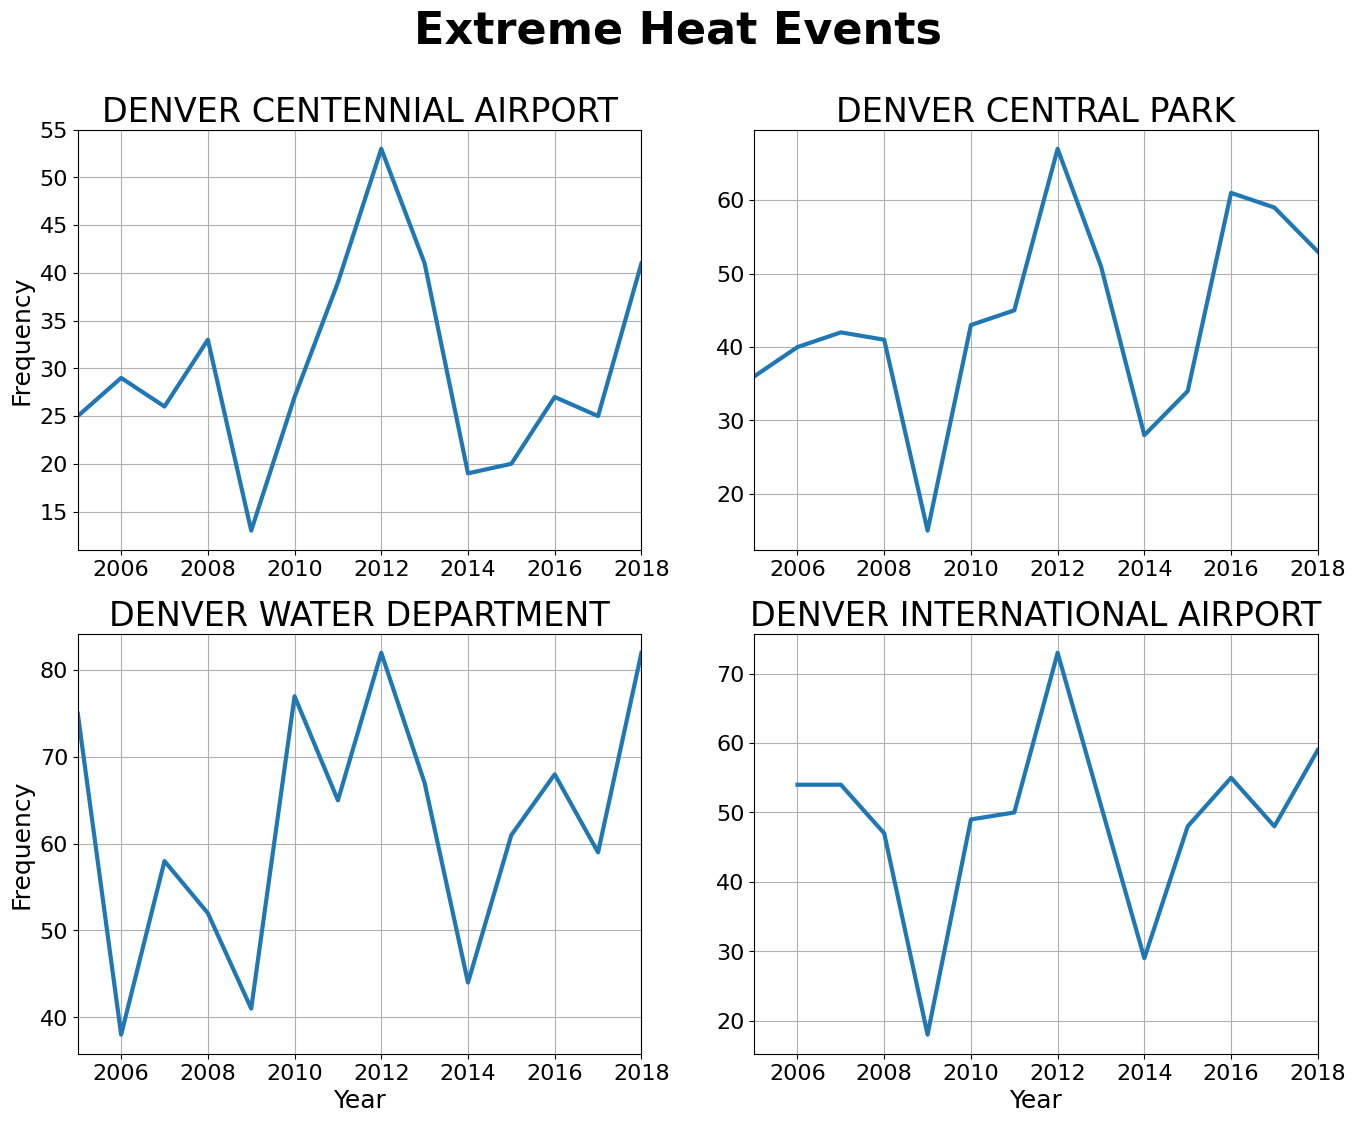

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16,12))

fig.suptitle("Extreme Heat Events", fontsize=32, fontweight='bold')

for s in range(len(unique_station_names)):
  # plot number of occurences
  ax[s//2, s%2].plot(df_extreme.xs(key=unique_station_names[s], level="NAME"),
                     linewidth=3)

  #set title, adjust ticks, turn on grid
  ax[s//2, s%2].set_title(f'{unique_station_names[s][:-7]}', fontsize=24)
  ax[s//2, s%2].tick_params(axis='both', which='major', labelsize=16)
  ax[s//2, s%2].set_xlim(2005, 2018)
  ax[s//2, s%2].grid()

# label axes
ax[0,0].set_ylabel('Frequency', fontsize=18)
ax[1,0].set_ylabel('Frequency', fontsize=18)

ax[1,0].set_xlabel('Year', fontsize=18)
ax[1,1].set_xlabel('Year', fontsize=18)

plt.show()


### This plot seems to confirm our hypothesis that the water department and the Centennial Airport are have the highest and lowest temperatures on average. The water department consistently has higher number of extreme heat days while the Centennial Airport consistently has a lower number of extreme heat days compared to the other locations.

### Interestingly, there seems to have been a steady rise in the frequency of extreme heat events in all four locations starting in 2014.

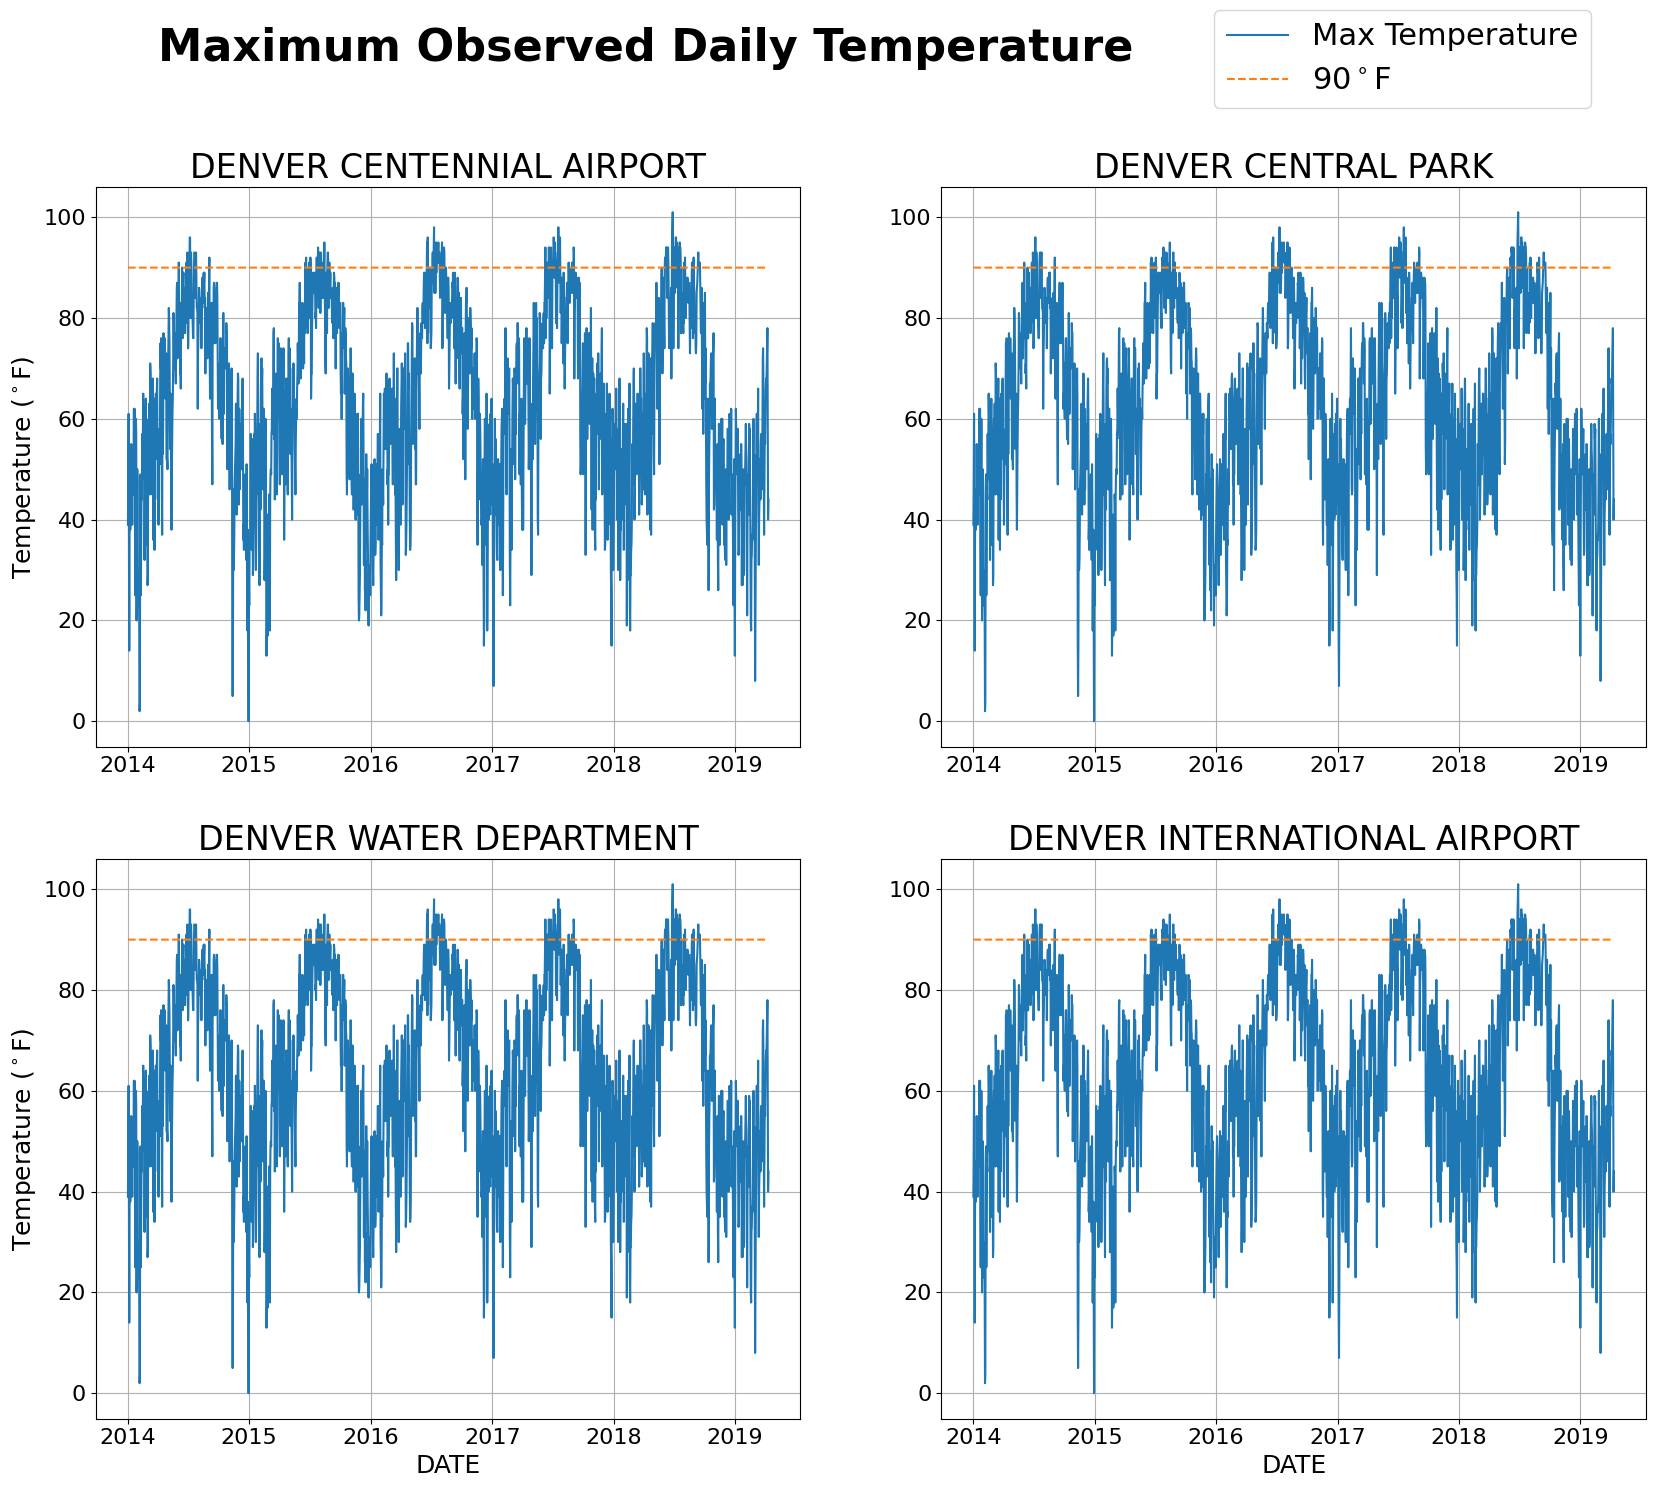

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,16))

fig.suptitle("Maximum Observed Daily Temperature", fontsize=32, fontweight='bold', x=0.4)

for s in range(len(unique_station_names)):
  df_station2014 = df[station_names==unique_station_names[0]]
  df_station2014 = df_station2014[df_station2014["YEAR"]>=2014]

  ax[s//2, s%2].plot(df_station2014.index.get_level_values("DATE"),
                     df_station2014["TMAX"],
                     label="Max Temperature")

  ax[s//2, s%2].plot(df_station2014.index.get_level_values("DATE"),
                     len(df_station2014)*[90],
                     linestyle='--',
                     label=r'$90^\circ$F')

  ax[s//2, s%2].set_title(f'{unique_station_names[s][:-7]}', fontsize=24)
  ax[s//2, s%2].grid()
  ax[s//2, s%2].tick_params(axis='both', which='major', labelsize=16)

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.88,1), fontsize=22)

ax[0,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=18)
ax[1,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=18)

ax[1,0].set_xlabel('DATE', fontsize=18)
ax[1,1].set_xlabel('DATE', fontsize=18)

plt.show()

### Now let's examine how precipitation has evolved over time. We can start by plotting the precipitation for each of the four stations in the year 2016.

In [8]:
df_2016 = df[df["YEAR"]==2016]
df_2016.head()

YEAR  MONTH  DAY      STATION  \
DATE       NAME                                                                 
2016-01-01 DENVER CENTRAL PARK, CO US           2016      1    1  USW00023062   
           DENVER WATER DEPARTMENT, CO US       2016      1    1  USC00052223   
           DENVER INTERNATIONAL AIRPORT, CO US  2016      1    1  USW00003017   
           DENVER CENTENNIAL AIRPORT, CO US     2016      1    1  USW00093067   
2016-01-02 DENVER WATER DEPARTMENT, CO US       2016      1    2  USC00052223   

                                                PRCP  TMAX  TMIN  SNOW  SNWD  \
DATE       NAME                                                                
2016-01-01 DENVER CENTRAL PARK, CO US            0.0  26.0   3.0   0.0   3.0   
           DENVER WATER DEPARTMENT, CO US        0.0  29.0   6.0   0.0   0.0   
           DENVER INTERNATIONAL AIRPORT, CO US   0.0  35.0   6.0   0.0   0.0   
           DENVER CENTENNIAL AIRPORT, CO US      0.0  36.0   2.0   0.0   0.0   
2016-01-02 DENVER WATER DEPARTMENT, CO US        0.0  40.0   5.0   0.0   0.0   

                                                AWND   WDF2   WDF5   WSF2  \
DATE       NAME                                                             
2016-01-01 DENVER CENTRAL PARK, CO US           6.60  225.0  220.0  15.00   
           DENVER WATER DEPARTMENT, CO US       6.60  225.0  220.0  15.00   
           DENVER INTERNATIONAL AIRPORT, CO US  8.95  220.0  220.0  19.90   
           DENVER CENTENNIAL AIRPORT, CO US     4.25  230.0  220.0  10.10   
2016-01-02 DENVER WATER DEPARTMENT, CO US       6.60  225.0  225.0  14.55   

                                                WSF5  \
DATE       NAME                                        
2016-01-01 DENVER CENTRAL PARK, CO US           17.0   
           DENVER WATER DEPARTMENT, CO US       17.0   
           DENVER INTERNATIONAL AIRPORT, CO US  21.9   
           DENVER CENTENNIAL AIRPORT, CO US     12.1   
2016-01-02 DENVER WATER DEPARTMENT, CO US       17.0   

                                                                    TARGET  
DATE       NAME                                                             
2016-01-01 DENVER CENTRAL PARK, CO US           (0.0, 29.0, 6.0, 0.0, 0.0)  
           DENVER WATER DEPARTMENT, CO US       (0.0, 35.0, 6.0, 0.0, 0.0)  
           DENVER INTERNATIONAL AIRPORT, CO US  (0.0, 36.0, 2.0, 0.0, 0.0)  
           DENVER CENTENNIAL AIRPORT, CO US     (0.0, 40.0, 5.0, 0.0, 0.0)  
2016-01-02 DENVER WATER DEPARTMENT, CO US       (0.0, 39.0, 3.0, 0.0, 2.0)

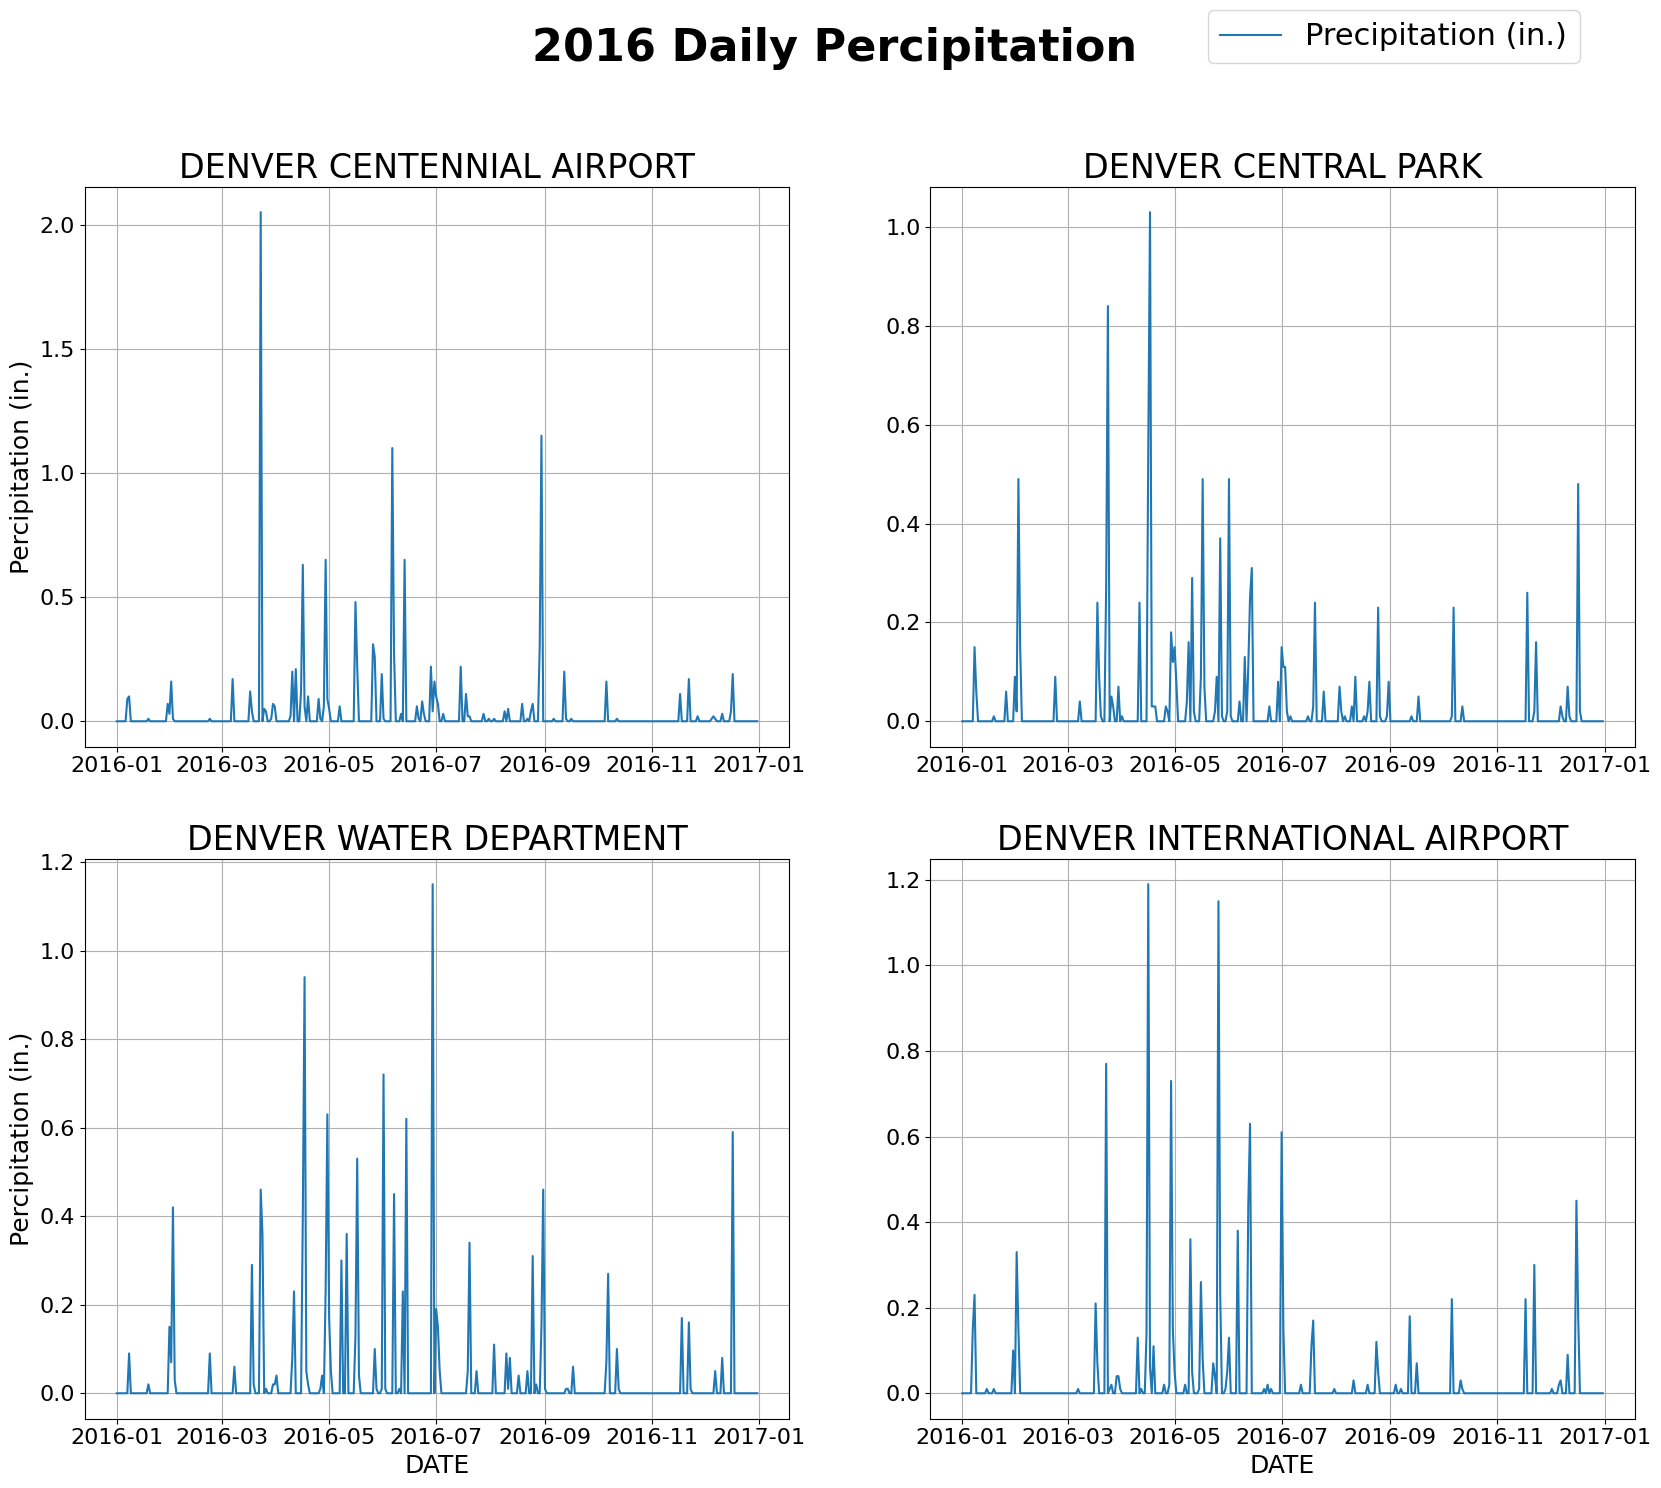

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,16))

fig.suptitle("2016 Daily Percipitation", fontsize=32, fontweight='bold')

for s in range(len(unique_station_names)):
  # filter by current station
  df_station2016 = df[station_names==unique_station_names[s]]

  # filter by year 2016
  df_station2016 = df_station2016[df_station2016["YEAR"]==2016]

  # plot percipitation for 2016
  ax[s//2, s%2].plot(df_station2016.index.get_level_values("DATE"),
                     df_station2016["PRCP"],
                     label="Precipitation (in.)")

  # add plot title, adjust tick size, insert grid
  ax[s//2, s%2].set_title(f'{unique_station_names[s][:-7]}', fontsize=24)
  ax[s//2, s%2].tick_params(axis='both', which='major', labelsize=16)
  ax[s//2, s%2].grid()

# insert legend
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.88,1), fontsize=22)

# label axes
ax[0,0].set_ylabel(r'Percipitation (in.)', fontsize=18)
ax[1,0].set_ylabel(r'Percipitation (in.)', fontsize=18)

ax[1,0].set_xlabel('DATE', fontsize=18)
ax[1,1].set_xlabel('DATE', fontsize=18)

plt.show()

### Now let's examine how the annual percipitation has changed throughout the years.

In [10]:
# group by station and year
# take sum of percipitation
df_annual_prcp = df.groupby(["NAME", "YEAR"]).sum()["PRCP"]

# omit 2019 since we don't have full data for this year in the data set
df_annual_prcp= df_annual_prcp[df_annual_prcp.index.get_level_values("YEAR") != 2019]

df_annual_prcp.head()

NAME                              YEAR
DENVER CENTENNIAL AIRPORT, CO US  2005    16.53
                                  2006    16.54
                                  2007    17.84
                                  2008    12.24
                                  2009    21.03
Name: PRCP, dtype: float64

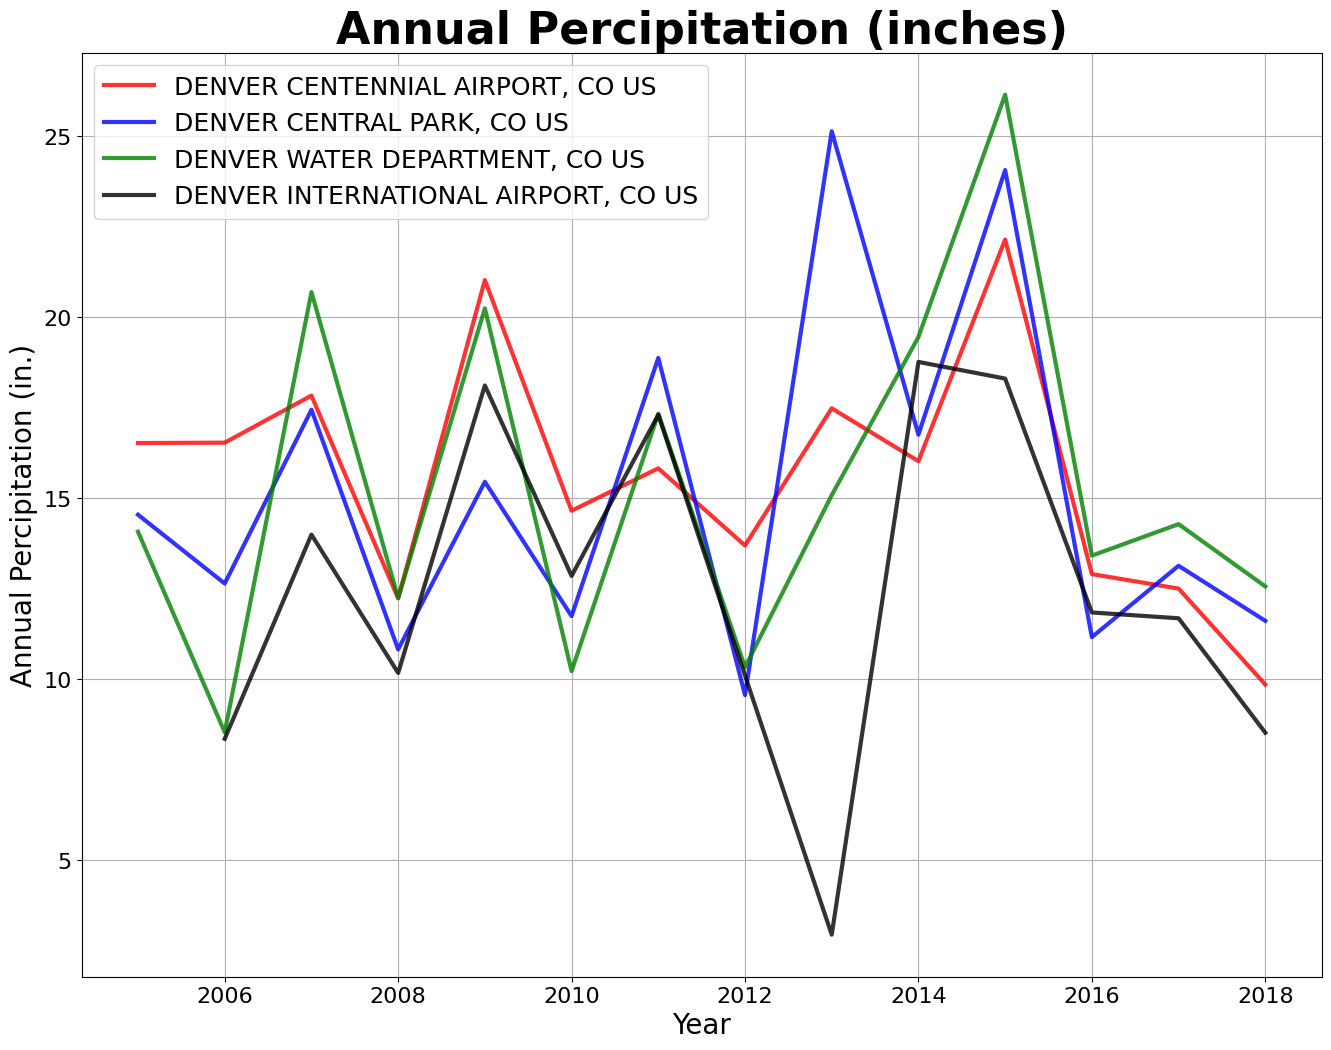

In [11]:
fig = plt.figure(figsize=(16,12))

plt.title("Annual Percipitation (inches)", fontsize=32, fontweight='bold')

for s in range(len(unique_station_names)):

  # plot annual percipitation for each station
  plt.plot(df_annual_prcp.xs(key=unique_station_names[s], level="NAME"),
           color = colors[s],
           label=unique_station_names[s],
           linewidth=3,
           alpha=0.8)

# insert legend and grid
plt.legend(fontsize=18)
plt.grid()

# label axes and adjust label size
plt.ylabel(r'Annual Percipitation (in.)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

### Rainfall patterns seem pretty consistent among all four stations. With only a few exceptions, the rainfall in all locations will rise and fall together.

### Finally, we will explore snowfall in each of the four locations. Lets plot the snowfall for each location.

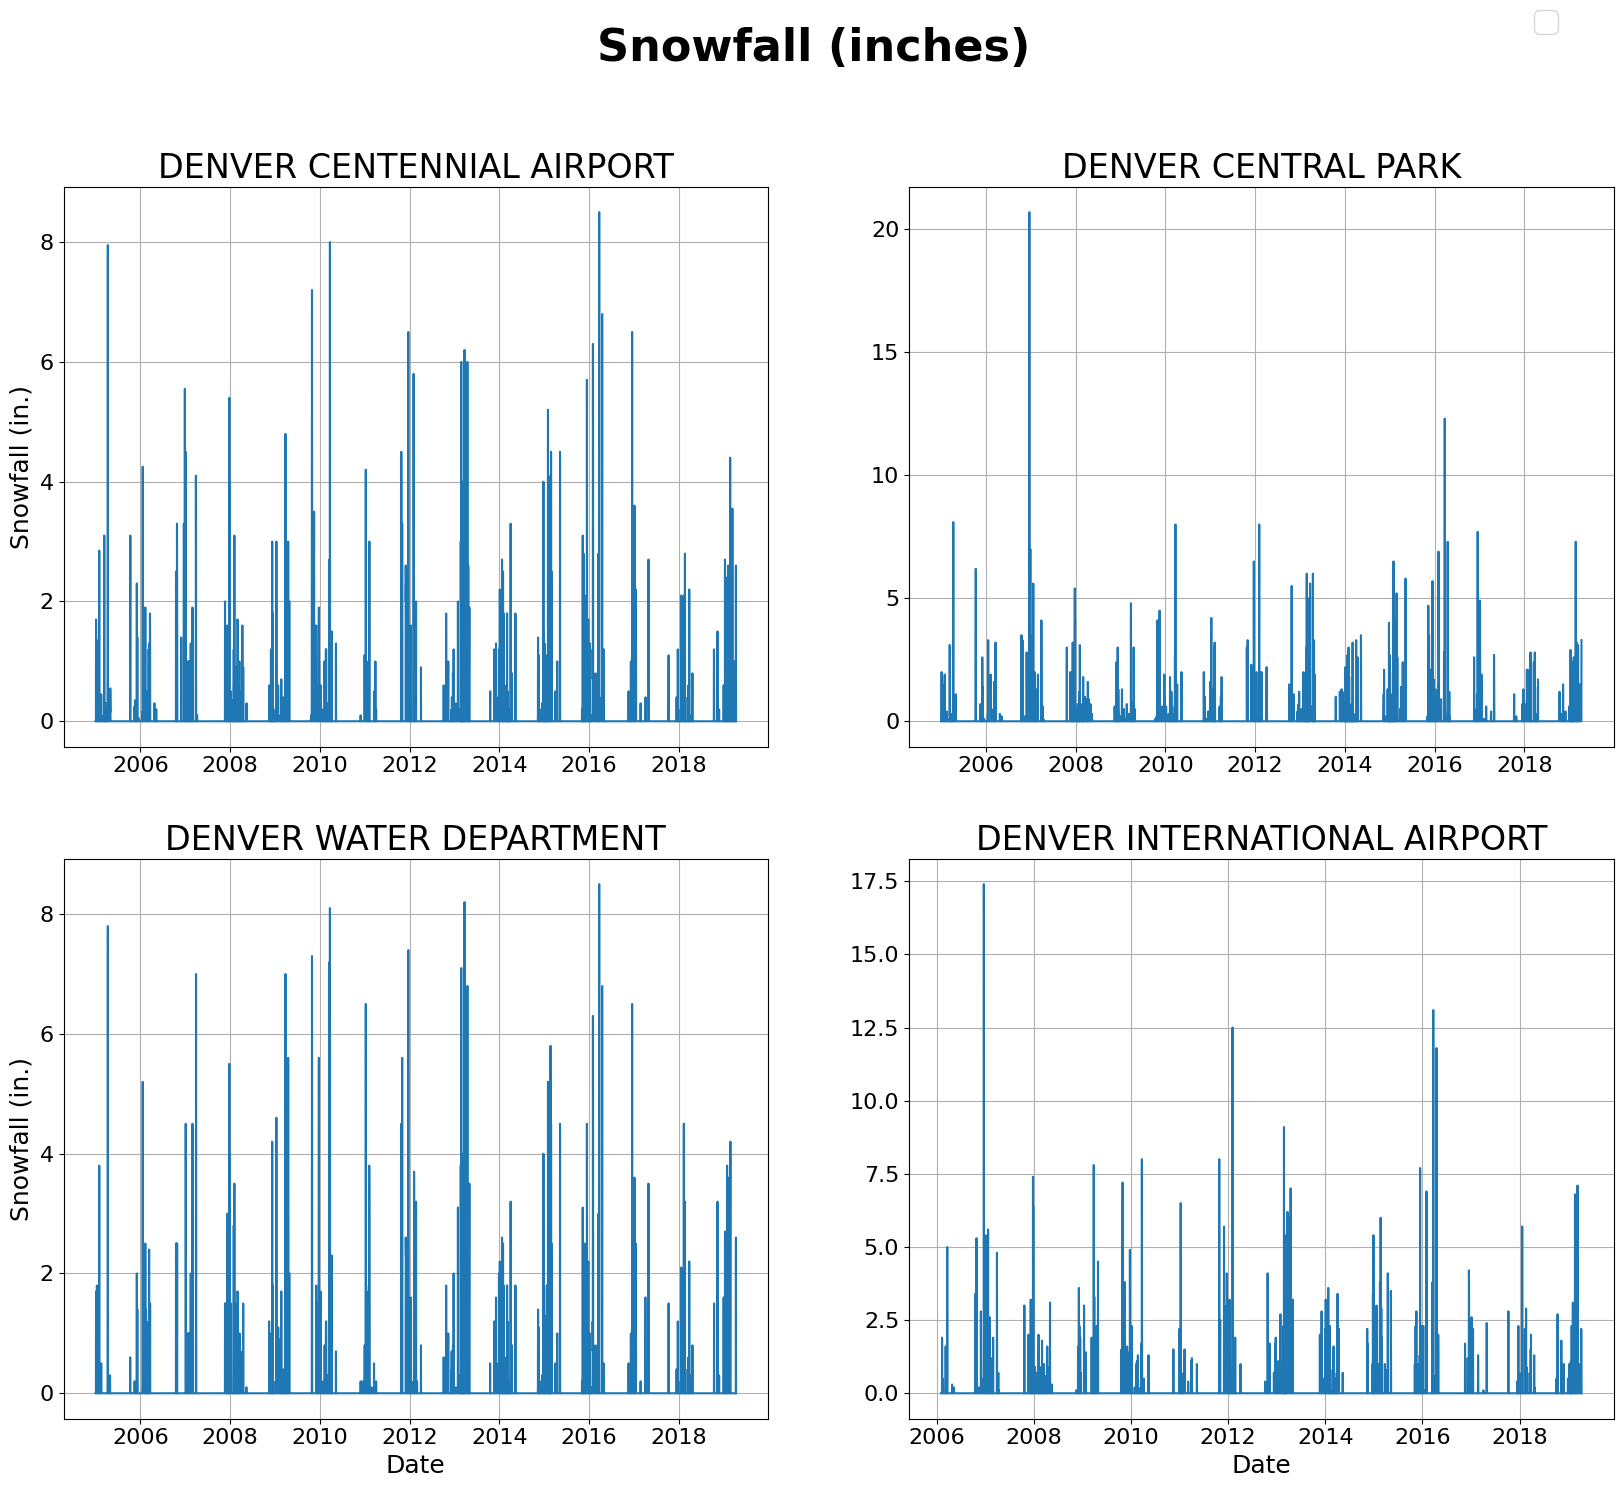

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,16))

fig.suptitle("Snowfall (inches)", fontsize=32, fontweight='bold')

for s in range(len(unique_station_names)):

  # plot annual percipitation for each station
  ax[s//2, s%2].plot(df.xs(key=unique_station_names[s], level="NAME")["SNOW"])

  # add title, format ticks, and insert grid
  ax[s//2, s%2].set_title(f'{unique_station_names[s][:-7]}', fontsize=24)
  ax[s//2, s%2].tick_params(axis='both', which='major', labelsize=16)
  #ax[s//2, s%2].set_xlim(2005,2019)
  ax[s//2, s%2].grid()

# insert global legend
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.88,1), fontsize=22)


ax[0,0].set_ylabel(r'Snowfall (in.)', fontsize=18)
ax[1,0].set_ylabel(r'Snowfall (in.)', fontsize=18)

ax[1,0].set_xlabel('Date', fontsize=18)
ax[1,1].set_xlabel('Date', fontsize=18)

plt.show()

### There is very clearly a snow season in Denver (shocking). Let's plot the snowfall for one particular year to find the months where snow is most common. We will plot the snowfall for the year 2015.

In [13]:
df_2015 = df[df["YEAR"]==2015]
df_2015.head()

YEAR  MONTH  DAY      STATION  \
DATE       NAME                                                                 
2015-01-01 DENVER CENTENNIAL AIRPORT, CO US     2015      1    1  USW00093067   
           DENVER WATER DEPARTMENT, CO US       2015      1    1  USC00052223   
           DENVER INTERNATIONAL AIRPORT, CO US  2015      1    1  USW00003017   
           DENVER CENTRAL PARK, CO US           2015      1    1  USW00023062   
2015-01-02 DENVER WATER DEPARTMENT, CO US       2015      1    2  USC00052223   

                                                PRCP  TMAX  TMIN  SNOW  SNWD  \
DATE       NAME                                                                
2015-01-01 DENVER CENTENNIAL AIRPORT, CO US     0.16  23.0   0.0   0.0   4.0   
           DENVER WATER DEPARTMENT, CO US       0.00  26.0   0.0   0.0   4.0   
           DENVER INTERNATIONAL AIRPORT, CO US  0.08  26.0   5.0   1.8   2.0   
           DENVER CENTRAL PARK, CO US           0.00  31.0 -10.0   0.0   4.0   
2015-01-02 DENVER WATER DEPARTMENT, CO US       0.03  19.0  10.0   0.5   4.0   

                                                 AWND   WDF2   WDF5  WSF2  \
DATE       NAME                                                             
2015-01-01 DENVER CENTENNIAL AIRPORT, CO US     3.800  130.0  140.0  13.0   
           DENVER WATER DEPARTMENT, CO US       5.925  150.0  160.0  14.0   
           DENVER INTERNATIONAL AIRPORT, CO US  8.050  170.0  180.0  15.0   
           DENVER CENTRAL PARK, CO US           5.925  150.0  160.0  14.0   
2015-01-02 DENVER WATER DEPARTMENT, CO US       8.610  170.0  185.0  16.0   

                                                 WSF5  \
DATE       NAME                                         
2015-01-01 DENVER CENTENNIAL AIRPORT, CO US     15.00   
           DENVER WATER DEPARTMENT, CO US       16.55   
           DENVER INTERNATIONAL AIRPORT, CO US  18.10   
           DENVER CENTRAL PARK, CO US           16.55   
2015-01-02 DENVER WATER DEPARTMENT, CO US       20.00   

                                                                      TARGET  
DATE       NAME                                                               
2015-01-01 DENVER CENTENNIAL AIRPORT, CO US       (0.0, 26.0, 0.0, 0.0, 4.0)  
           DENVER WATER DEPARTMENT, CO US        (0.08, 26.0, 5.0, 1.8, 2.0)  
           DENVER INTERNATIONAL AIRPORT, CO US  (0.0, 31.0, -10.0, 0.0, 4.0)  
           DENVER CENTRAL PARK, CO US           (0.03, 19.0, 10.0, 0.5, 4.0)  
2015-01-02 DENVER WATER DEPARTMENT, CO US        (0.0, 34.0, 10.0, 0.5, 4.0)

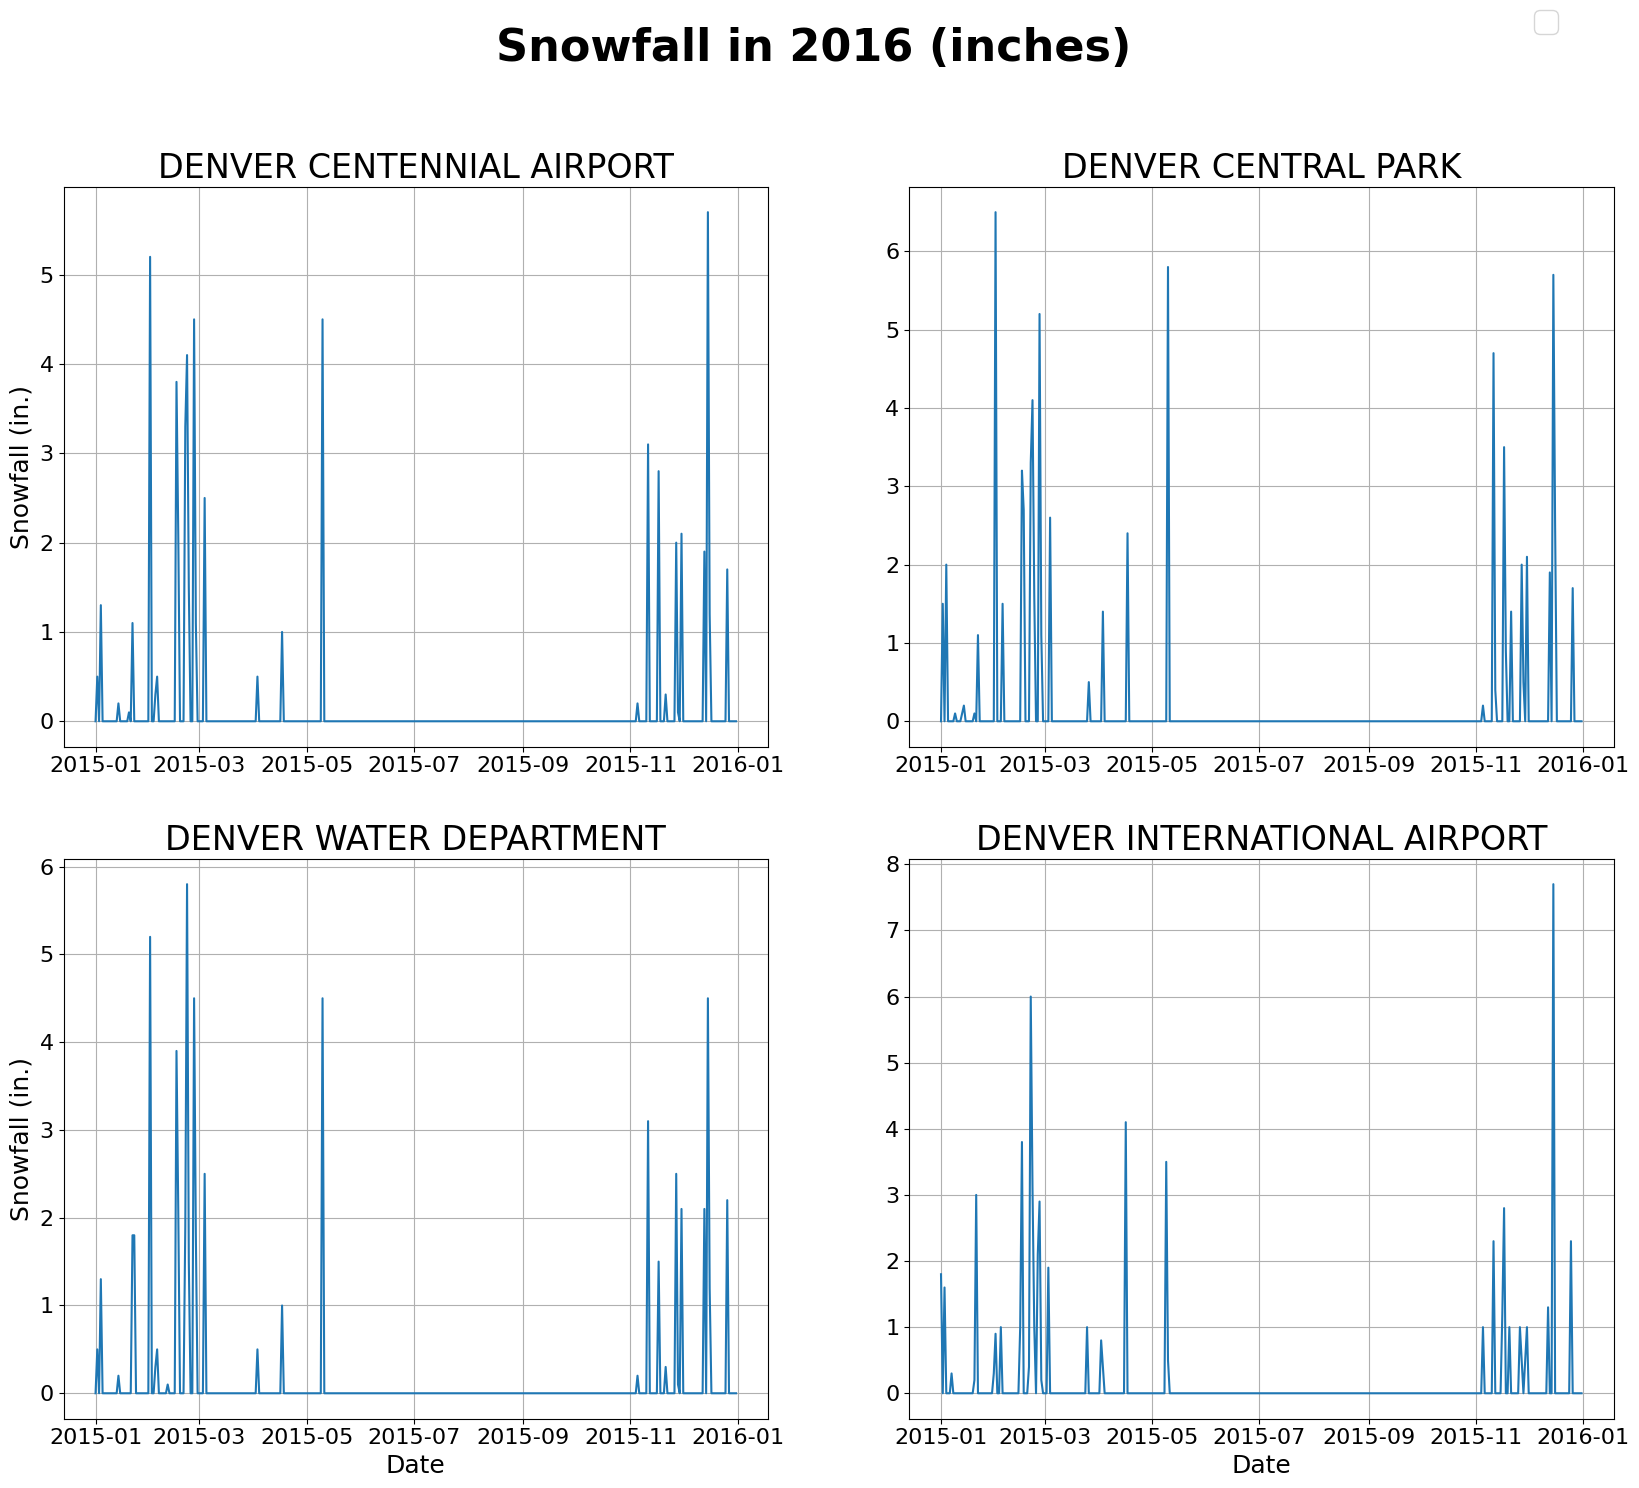

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,16))

fig.suptitle("Snowfall in 2016 (inches)", fontsize=32, fontweight='bold')

for s in range(len(unique_station_names)):
  df_station_2015 = df_2015.xs(key=unique_station_names[s], level="NAME")

  # plot annual percipitation for each station
  ax[s//2, s%2].plot(df_station_2015["SNOW"])

  # add title, format ticks, and insert grid
  ax[s//2, s%2].set_title(f'{unique_station_names[s][:-7]}', fontsize=24)
  ax[s//2, s%2].tick_params(axis='both', which='major', labelsize=16)
  ax[s//2, s%2].grid()

# insert global legend
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.88,1), fontsize=22)

# label axes
ax[0,0].set_ylabel(r'Snowfall (in.)', fontsize=18)
ax[1,0].set_ylabel(r'Snowfall (in.)', fontsize=18)

ax[1,0].set_xlabel('Date', fontsize=18)
ax[1,1].set_xlabel('Date', fontsize=18)

plt.show()

### It appears that snow season begins in November and lasts until March, with the occasional snow day occuring between March and November.

### Let's see if the annual snowfall differs between each of the four locations. Given that the water department is the warmest, we would expect it to have less snowfall. Inversely, we would expect the Centennial Airport to have the most snow since it is generally the coolest.

In [15]:
df_snow = df[df["YEAR"] != 2019]
df_snow = df_snow.groupby(["NAME", "YEAR"]).sum()["SNOW"]
df_snow.head()

NAME                              YEAR
DENVER CENTENNIAL AIRPORT, CO US  2005    34.00
                                  2006    33.05
                                  2007    43.10
                                  2008    24.30
                                  2009    43.00
Name: SNOW, dtype: float64

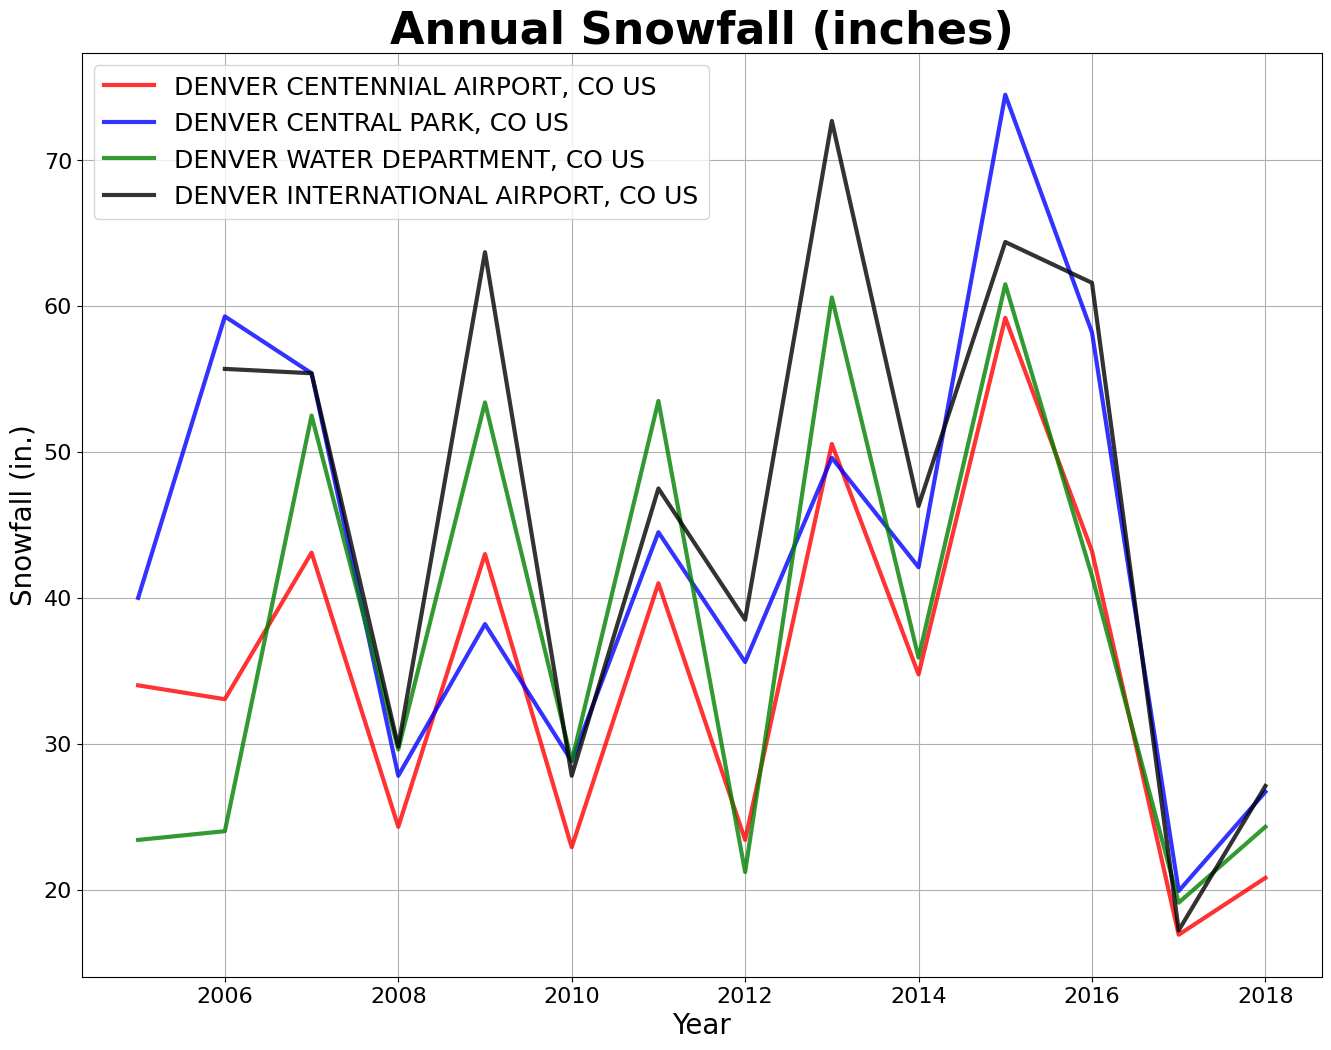

In [16]:
fig = plt.figure(figsize=(16,12))

plt.title("Annual Snowfall (inches)", fontsize=32, fontweight='bold')

for s in range(len(unique_station_names)):
  station = unique_station_names[s]
  plt.plot(df_snow.xs(key=station, level="NAME"),
           color=colors[s],
           label=station,
           linewidth=3,
           alpha=0.8)
  """plt.scatter(df_snow.xs(key=station, level="NAME").index,
              df_snow.xs(key=station, level="NAME"),
              color=colors[s],
              label=station,
              linewidth=3,
              alpha=0.8)"""

# insert legend
plt.legend(fontsize=18)
plt.grid()

# label axes
plt.ylabel(r'Snowfall (in.)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

### There doesn't seem to be one station in particular that has consistently higher or lower snowfall than the rest. We see that althouth the magnitude of snowfall differs between the locations, they all follow a similar pattern, meaning that there is a relationship between the current snowfall and the snowfall of the previous year.

### In general, the four stations seem to have distinct, albeit relatively similar, observations. It is unclear whether there is a relationship between the stations and the observations. This can be explored further as we fit our model to the data.